###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



Ονοματεπώνυμο φοιτητή: Κούτρας Ιωάννης

Α.Μ.: 03120130

ΣΧΟΛΙΟ:
Γενικά τα σχόλια που συνοδεύουν source code στα cells είναι γραμμένα στα αγγλικά. Αντίθετα, παράθεση-σχολιασμός γραφικών και επεξήγηση επιδόσεων ορισμένων μοντέλων γίνεται στα ελληνικά.
Παραθέτονται επίσης και οι εκφωνήσεις.

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [1]:
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

is_cuda_available = torch.cuda.is_available()

if is_cuda_available:
    print("CUDA is available!")
else:
    print("CUDA is not available.")



ModuleNotFoundError: No module named 'torch'

1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [4]:
test_dataset_path = 'test.csv'

df = pd.read_csv(test_dataset_path)

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,22/03/2009,Albury,14.6,30.0,0.0,NaN,NaN,NE,37.0,E,...,19.0,56.0,30.0,1014.8,1012.7,3.0,1.0,18.1,29.0,0
1,15/04/2009,Albury,10.7,21.9,0.0,NaN,NaN,W,63.0,NW,...,31.0,44.0,27.0,1008.2,1009.8,2.0,NaN,20.5,18.9,0
2,21/04/2009,Albury,5.7,21.4,0.0,NaN,NaN,ESE,17.0,ENE,...,7.0,68.0,39.0,1025.2,1020.9,NaN,NaN,12.2,20.9,0
3,24/04/2009,Albury,10.6,16.2,0.0,NaN,NaN,WNW,39.0,ESE,...,4.0,74.0,86.0,1008.9,1002.4,8.0,8.0,14.9,15.1,0
4,19/05/2009,Albury,3.7,19.1,0.0,NaN,NaN,SSE,19.0,NaN,...,11.0,87.0,51.0,1023.6,1019.9,NaN,NaN,7.4,18.9,0


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [5]:
# EDA on the "train-val.csv" dataset
data = pd.read_csv('train-val.csv')

# Information about the dataset
data_info = data.info()

# 2a, 2d Number of samples and features
num_samples = data.shape[0]
num_features = data.shape[1]

# 2b Feature types
feature_types = data.dtypes

# 2c Feature labels
feature_labels = data.columns.tolist()

# 2e Number of samples per category for the target variable 'RainTomorrow'
samples_per_category = data['RainTomorrow'].value_counts()

# 2στ Correlation between features
correlation_matrix = data.select_dtypes(include=['number']).corr()

data_info, num_samples, num_features, feature_types, feature_labels,  samples_per_category, correlation_matrix.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Date           48423 non-null  object 
 2   Location       48423 non-null  object 
 3   MinTemp        48263 non-null  float64
 4   MaxTemp        48322 non-null  float64
 5   Rainfall       48423 non-null  float64
 6   Evaporation    28039 non-null  float64
 7   Sunshine       25426 non-null  float64
 8   WindGustDir    45302 non-null  object 
 9   WindGustSpeed  45330 non-null  float64
 10  WindDir9am     44602 non-null  object 
 11  WindDir3pm     47095 non-null  object 
 12  WindSpeed9am   48066 non-null  float64
 13  WindSpeed3pm   47566 non-null  float64
 14  Humidity9am    47865 non-null  float64
 15  Humidity3pm    47164 non-null  float64
 16  Pressure9am    43643 non-null  float64
 17  Pressure3pm    43634 non-null  float64
 18  Cloud9

(None,
 48423,
 24,
 id                 int64
 Date              object
 Location          object
 MinTemp          float64
 MaxTemp          float64
 Rainfall         float64
 Evaporation      float64
 Sunshine         float64
 WindGustDir       object
 WindGustSpeed    float64
 WindDir9am        object
 WindDir3pm        object
 WindSpeed9am     float64
 WindSpeed3pm     float64
 Humidity9am      float64
 Humidity3pm      float64
 Pressure9am      float64
 Pressure3pm      float64
 Cloud9am         float64
 Cloud3pm         float64
 Temp9am          float64
 Temp3pm          float64
 RainToday        float64
 RainTomorrow     float64
 dtype: object,
 ['id',
  'Date',
  'Location',
  'MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustDir',
  'WindGustSpeed',
  'WindDir9am',
  'WindDir3pm',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm',
  'RainToda

In [6]:
# Using seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram of the 'Rainfall' feature
sns.histplot(data['Rainfall'], bins=30, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Rainfall')
axes[0, 0].set_xlabel('Rainfall (mm)')
axes[0, 0].set_ylabel('Frequency')

# Count plot of the 'RainTomorrow' feature
sns.countplot(x='RainTomorrow', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Count Plot of RainTomorrow')
axes[0, 1].set_xlabel('Rain Tomorrow')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No', 'Yes'])

# Box plot of 'Humidity3pm' grouped by 'RainTomorrow'
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Humidity3pm grouped by RainTomorrow')
axes[1, 0].set_xlabel('Rain Tomorrow')
axes[1, 0].set_ylabel('Humidity at 3 PM (%)')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No', 'Yes'])


# Scatter plot to examine the relationship between 'Pressure9am' and 'Humidity3pm'
# Colored by 'RainTomorrow' using seabornscatter_data = data.dropna(subset=['Pressure9am', 'Humidity3pm'])
scatter_data = data.dropna(subset=['Pressure9am', 'Humidity3pm'])

scatter_plot = sns.scatterplot(x='Pressure9am', y='Humidity3pm', hue='RainTomorrow', data=scatter_data, alpha=0.6, ax=axes[1, 1])
scatter_plot.set_title('Scatter Plot of Pressure9am vs Humidity3pm, colored by RainTomorrow')
scatter_plot.set_xlabel('Pressure at 9 AM (hPa)')
scatter_plot.set_ylabel('Humidity at 3 PM (%)')
scatter_plot.legend(title='Rain Tomorrow', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

In [5]:
# Now use svm to find the line for the scatter plot between humidity at 3pm and pressure at 9 Am

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Prepare the data for SVM
X = scatter_data[['Pressure9am', 'Humidity3pm']]
y = scatter_data['RainTomorrow']

# Standardize features and fit SVM

svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_pipeline.fit(X, y)

print("svm fitted successfully")

svm fitted successfully


//anaconda3/envs/pythonProject/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


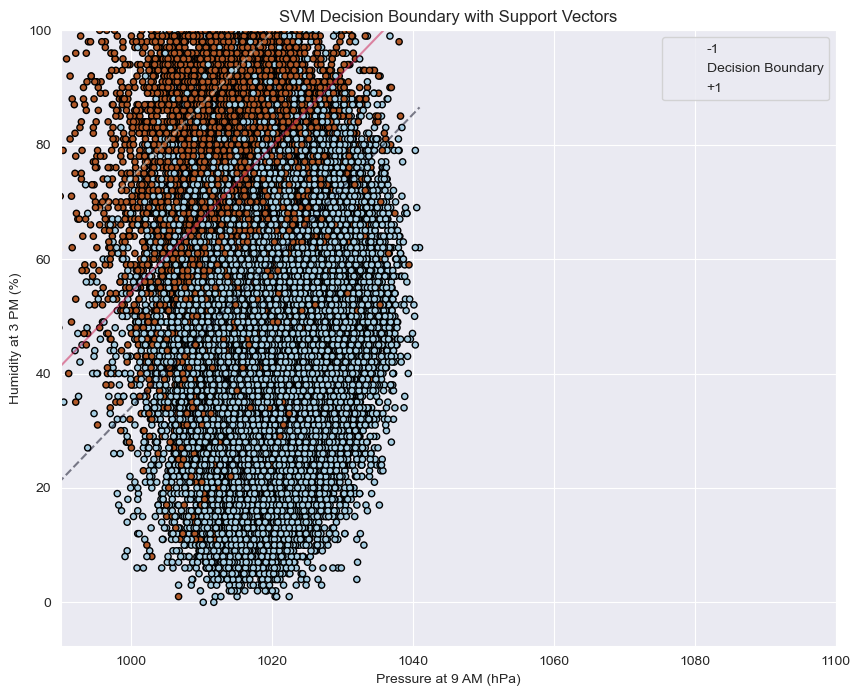

weights: [-0.44996882  1.00310421] bias: -1.2976910373315107


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve the model from the pipeline
svm_model = svm_pipeline.named_steps['svc']

# Get the coefficients and intercept of the hyperplane
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

# Generate grid for decision boundary
grid_x = np.linspace(X['Pressure9am'].min(), X['Pressure9am'].max(), 30)
grid_y = np.linspace(X['Humidity3pm'].min(), X['Humidity3pm'].max(), 30)
grid_X, grid_Y = np.meshgrid(grid_x, grid_y)
grid = np.c_[grid_X.ravel(), grid_Y.ravel()]

# Transform the grid using the same standardization as the model
scaler = svm_pipeline.named_steps['standardscaler']
grid_standardized = scaler.transform(grid)

# Predict on the grid
decision_values = svm_model.decision_function(grid_standardized)
grid_Z = decision_values.reshape(grid_X.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
contour = plt.contour(grid_X, grid_Y, grid_Z, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(X['Pressure9am'], X['Humidity3pm'], c=y, cmap=plt.cm.Paired, edgecolors='k', s=20)

# Plot support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k')

plt.xlim(990,1100)

plt.xlabel('Pressure at 9 AM (hPa)')
plt.ylabel('Humidity at 3 PM (%)')
plt.title('SVM Decision Boundary with Support Vectors')
plt.legend(handles=contour.collections, labels=['-1', 'Decision Boundary', '+1'], loc='upper right')
plt.show()

print(f'weights: {w} bias: {b}')

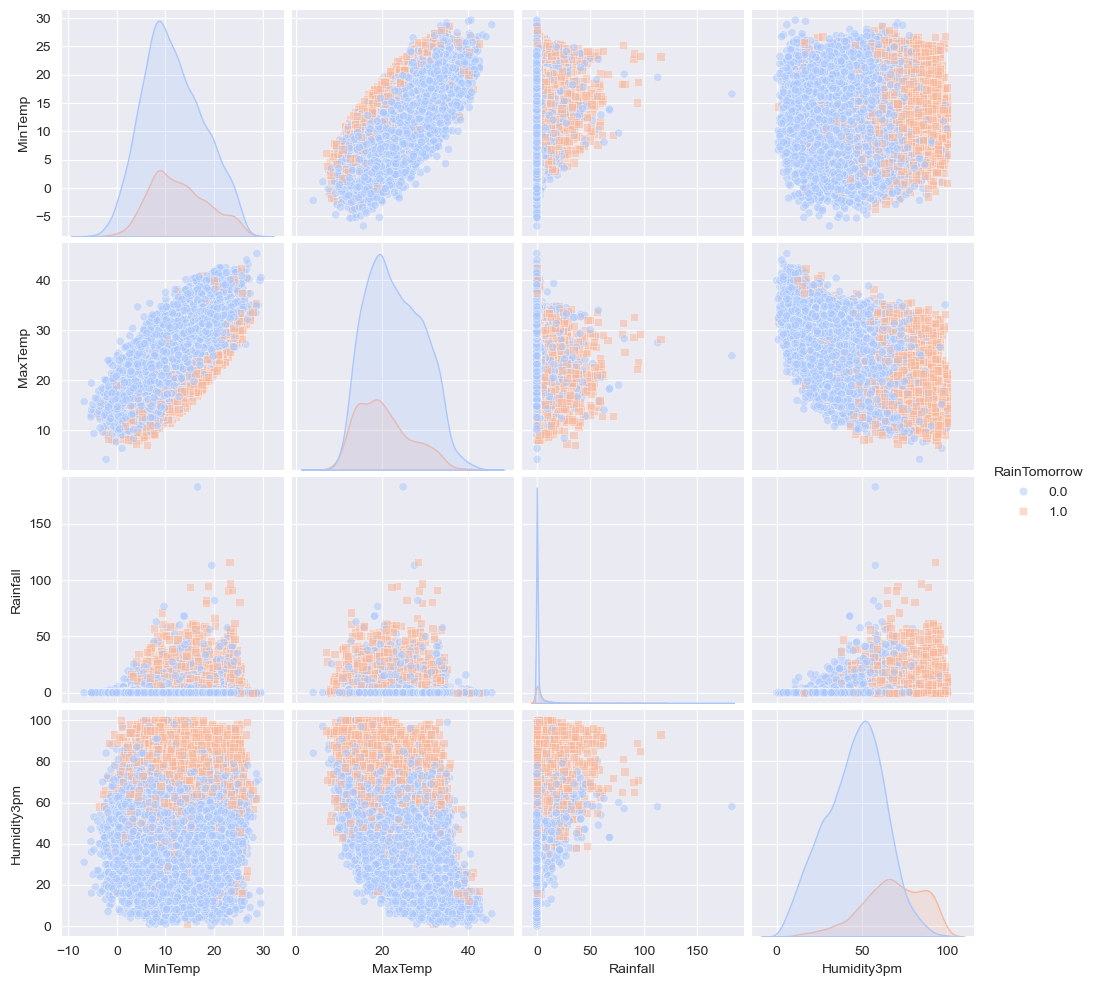

In [7]:
# Re-importing seaborn in case the environment has reset
import seaborn as sns

# For more insightful results, let's take a subset of the data to avoid memory issues
# Select a few columns that might give us interesting insights when visualized
subset_data = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                    'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']].dropna()

# Visualize pairwise relationships with hue semantics for 'RainTomorrow'
sns.pairplot(subset_data, hue='RainTomorrow', vars=['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm'],
             palette='coolwarm', markers=["o", "s"], plot_kws={'alpha': 0.5})

plt.show()


### Βλέπουμε ότι:

* Το dataset έχει 3.5 times πιο πολλά "no" απ'ότι "yes" στο target variable. (Biased)
* b) Με 40-60% humidity είναι πιο πιθανό να βρέξει απ'ότι με 60 - 80%
* c) Από το scatter with hue αν χρησιμοποιήσουμε το SupportVectorMachine μπορούμε να βρούμε το separation line:
 - pressure9am - 0.44 * hum3pm = 1.3 και πάνω είναι "no" , κάτω είναι "yes"

Επίσης, ανεξαρτήτως temp, το humidity είναι ο κύριος παράγοντας για το αποτέλεσμα συνεπώς το min temp δεν έχει ουσιώδες correlation με το humidity3pm. Κάτι ανάλογο συμβαίνει και για το maxtemp αν και σε temp >30 είναι εξαιρετικά πιθανό να μην βρέξει.



### 3. Προεπεξεργασία συνόλου δεδομένων
`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


In [8]:
# Because there will be modifications, to be safe we will do them in a separate csv file
# Save the modified dataframe to a new CSV file
import pandas as pd
data = pd.read_csv('train-val.csv')
test_data = pd.read_csv('test.csv')
modified_data_path = 'my_train.csv'
modified_test_data_path = 'my_test.csv'

data.to_csv(modified_data_path, index=False)
test_data.to_csv(modified_test_data_path, index=False)

# change the data variable value to the modified my_train.csv file
data = pd.read_csv('my_train.csv')
test_data = pd.read_csv('my_test.csv')
# data.drop("Date", axis=1, inplace=True)

# Return the path to the saved file
modified_data_path, modified_test_data_path

('my_train.csv', 'my_test.csv')

In [9]:
# To add week information to the dataset, we first need to ensure there is a date column
# from which we can extract week information. Let's check the first few rows to see the data structure.

# Check if there is a date column in the original data
if 'Date' in data.columns:
    # Convert 'Date' to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    test_data['Date'] = pd.to_datetime(test_data['Date'], format='%d/%m/%Y')
    
    # Extract week number from the 'Date' column and create a new feature 'WeekOfYear'
    data['WeekOfYear'] = data['Date'].dt.isocalendar().week
    test_data['WeekOfYear'] = test_data['Date'].dt.isocalendar().week
else:
    raise ValueError("No 'Date' column found in the dataset to extract week information.")

data.to_csv('my_train.csv')
test_data.to_csv('my_test.csv')

# Display the dataset to confirm the new column
data[['Date', 'WeekOfYear']].head(), test_data[['Date', 'WeekOfYear']].head()


(        Date  WeekOfYear
 0 2009-03-04          10
 1 2009-03-05          10
 2 2009-03-09          11
 3 2009-03-10          11
 4 2009-03-11          11,
         Date  WeekOfYear
 0 2009-03-22          12
 1 2009-04-15          16
 2 2009-04-21          17
 3 2009-04-24          17
 4 2009-05-19          21)

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [10]:
# Finding the missing values percentage of every attribute:
# Calculate the number of missing values and the percentage of the total for each column
missing_values_count = data.isnull().sum()
missing_values_percentage = (missing_values_count / len(data)) * 100

# Create a dataframe to display the missing values count and percentage for each column
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

# Display the missing values dataframe sorted by percentage of missing values in descending order
missing_values_df_sorted = missing_values_df[missing_values_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print(missing_values_df_sorted)


               Missing Values  Percentage
Sunshine                22997   47.491894
Evaporation             20384   42.095698
Cloud3pm                18981   39.198315
Cloud9am                17890   36.945253
Pressure3pm              4789    9.889928
Pressure9am              4780    9.871342
WindDir9am               3821    7.890878
WindGustDir              3121    6.445284
WindGustSpeed            3093    6.387461
WindDir3pm               1328    2.742498
Humidity3pm              1259    2.600004
Temp3pm                   913    1.885468
WindSpeed3pm              857    1.769820
Humidity9am               558    1.152345
WindSpeed9am              357    0.737253
Temp9am                   226    0.466720
MinTemp                   160    0.330421
MaxTemp                   101    0.208579


In [11]:
# Same for the test s# Finding the missing values percentage of every attribute:
# Calculate the number of missing values and the percentage of the total for each column
# test_data = pd.read_csv(test_dataset_path)
missing_values_count = test_data.isnull().sum()
missing_values_percentage = (missing_values_count / len(test_data)) * 100

# Create a dataframe to display the missing values count and percentage for each column
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

# Display the missing values dataframe sorted by percentage of missing values in descending order
missing_values_df_sorted = missing_values_df[missing_values_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
missing_values_df_sorted

,Missing Values,Percentage
Sunshine,4636,47.798742
Evaporation,4139,42.674503
Cloud3pm,3852,39.715435
Cloud9am,3639,37.519332
Pressure3pm,950,9.794824
Pressure9am,942,9.712341
WindDir9am,739,7.619342
WindGustDir,692,7.134756
WindGustSpeed,688,7.093515
WindDir3pm,285,2.938447


In [12]:
class nan_meaning_test():
    def __init__(self, attr_name):
        self.attr = attr_name
    
    def missingness_check1(self):
        # Create a binary indicator for missingness in the 'self.attr_name' column
        data[self.attr + '_Missing'] = data[self.attr].isnull().astype(int)
        
        # Set up the matplotlib figure
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        
        # Boxplot for RainToday vs {self.attr_name} missingness
        sns.boxplot(x=self.attr + '_Missing', y='Cloud9am', data=data, ax=axs[0, 0])
        axs[0, 0].set_title('Boxplot of Cloud9am vs ' + self.attr + ' Missingness')
        
        # Boxplot for RainTomorrow vs {self.attr_name} missingness
        sns.boxplot(x=self.attr + '_Missing', y='Cloud3pm', data=data, ax=axs[0, 1])
        axs[0, 1].set_title('Boxplot of Cloud3pm vs ' + self.attr + ' Missingness')
        
        # Bar plot for RainToday and {self.attr_name} missingness
        sns.barplot(x=self.attr + '_Missing', y='RainToday', data=data, ax=axs[1, 0])
        axs[1, 0].set_title('Bar plot of RainToday vs ' + self.attr + ' Missingness')
        
        # Bar plot for RainTomorrow and {self.attr_name} missingness
        sns.barplot(x=self.attr + '_Missing', y='RainTomorrow', data=data, ax=axs[1, 1])
        axs[1, 1].set_title('Bar plot of RainTomorrow vs ' + self.attr + ' Missingness')
        
        # Adjust the layout
        plt.tight_layout()
        plt.show()        
    
    def missingness_check2(self):

        
        # Now we create the correlation matrix
        correlation_matrix = data[[self.attr + '_Missing', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']].corr()
        
        # Set up the matplotlib figure for the heatmap
        plt.figure(figsize=(10, 8))
        
        # Draw the heatmap
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
        
        # Show the heatmap
        plt.title(f'Heatmap of Correlation with {self.attr} Missingness')
        plt.show()


            
    def purge(self):
        data.drop(self.attr + '_Missing', axis=1, inplace=True)
        
    def test_and_purge(self):
        self.missingness_check1()
        self.missingness_check2()
        self.purge()
        


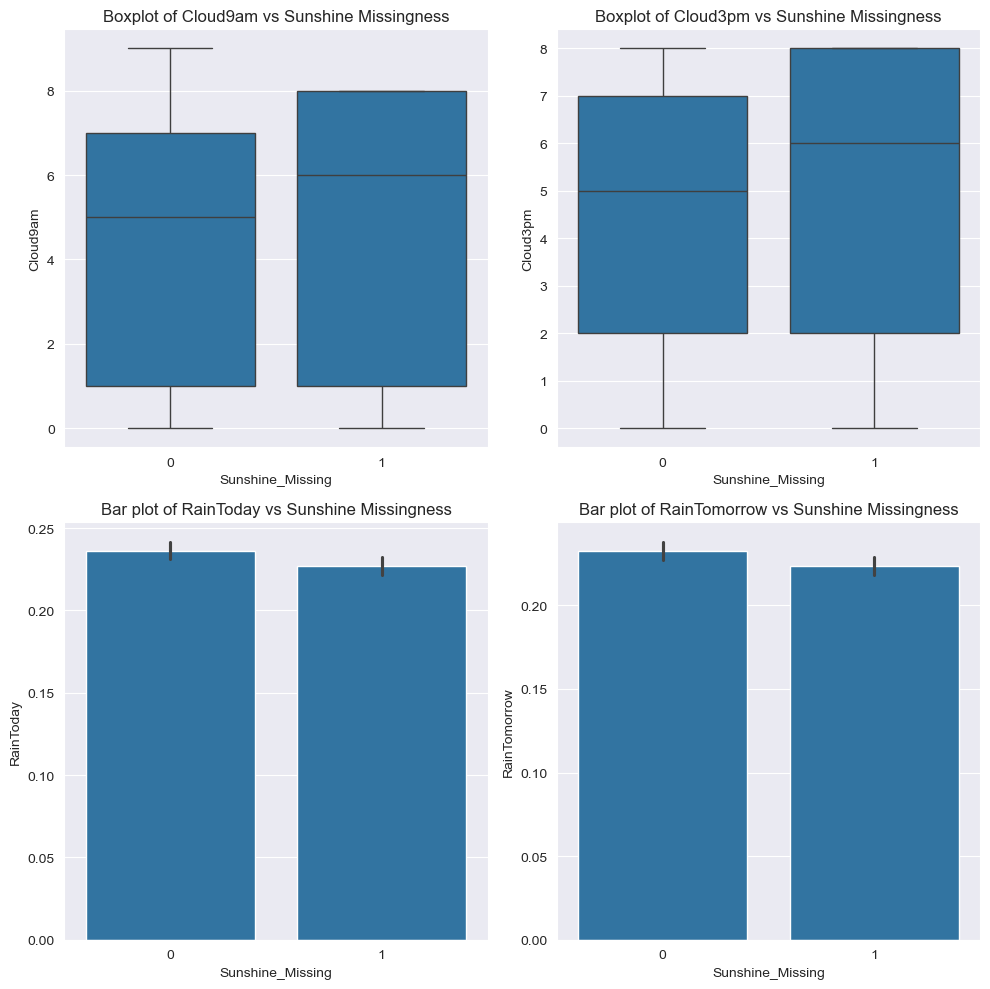

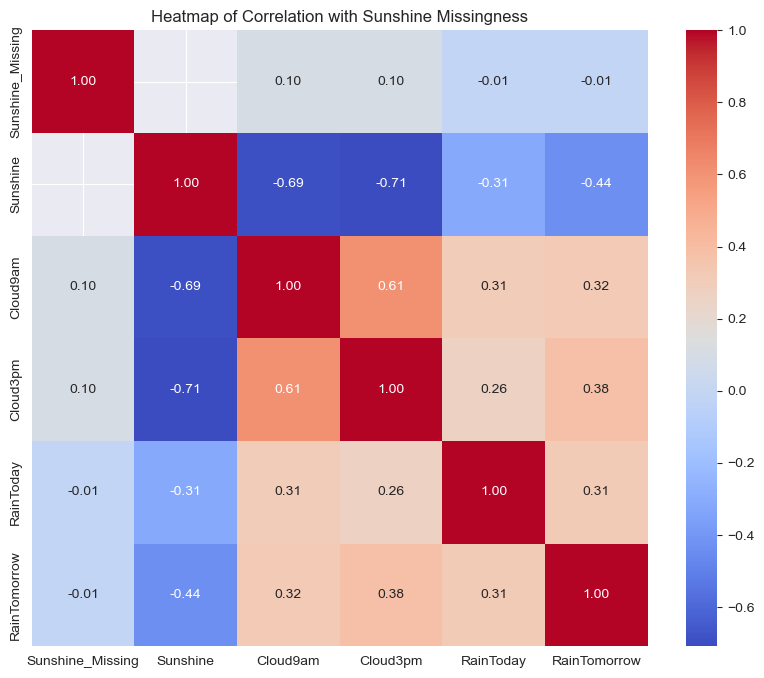

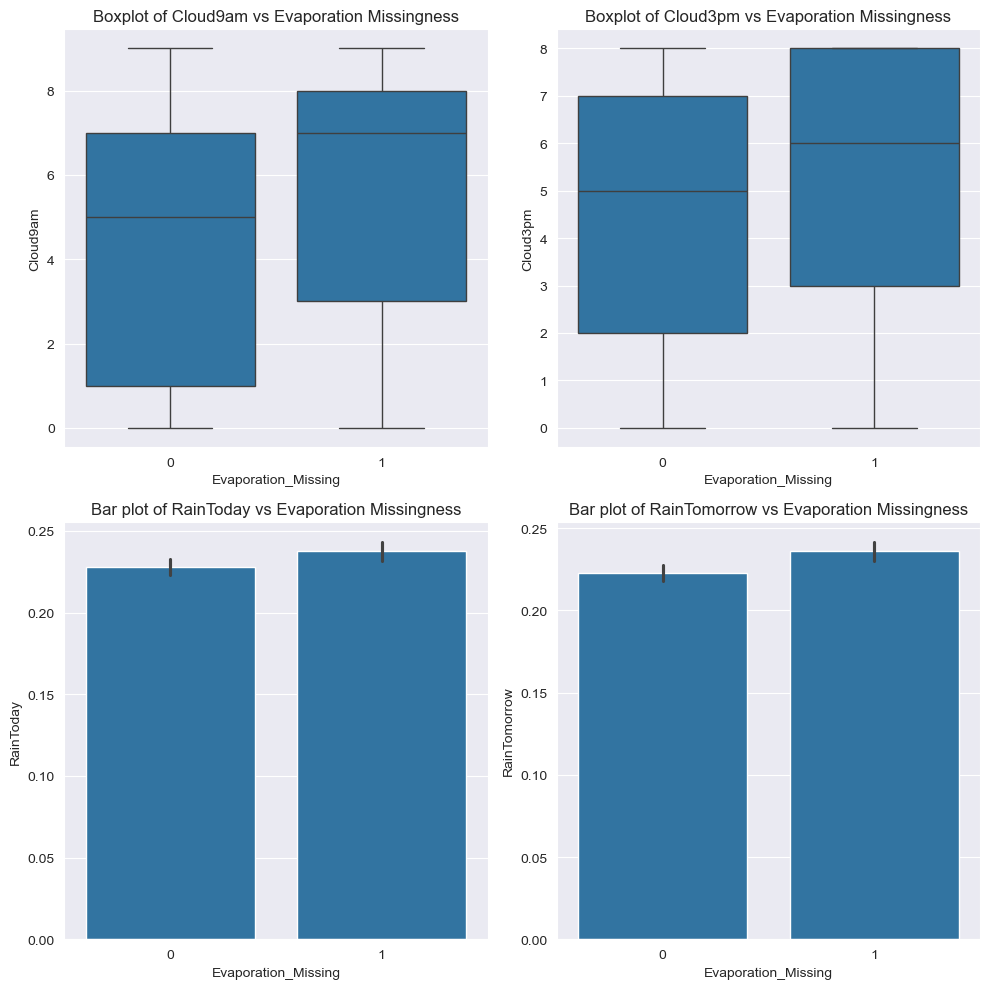

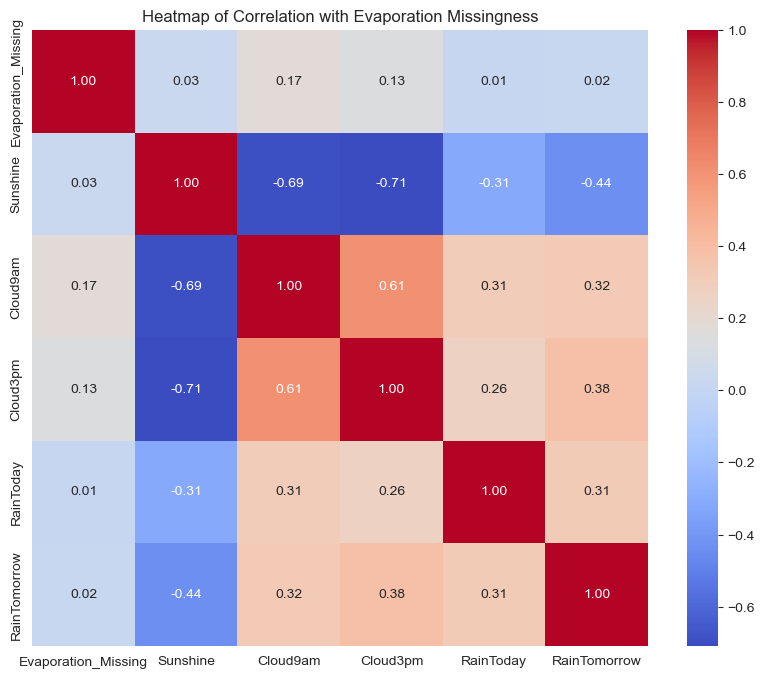

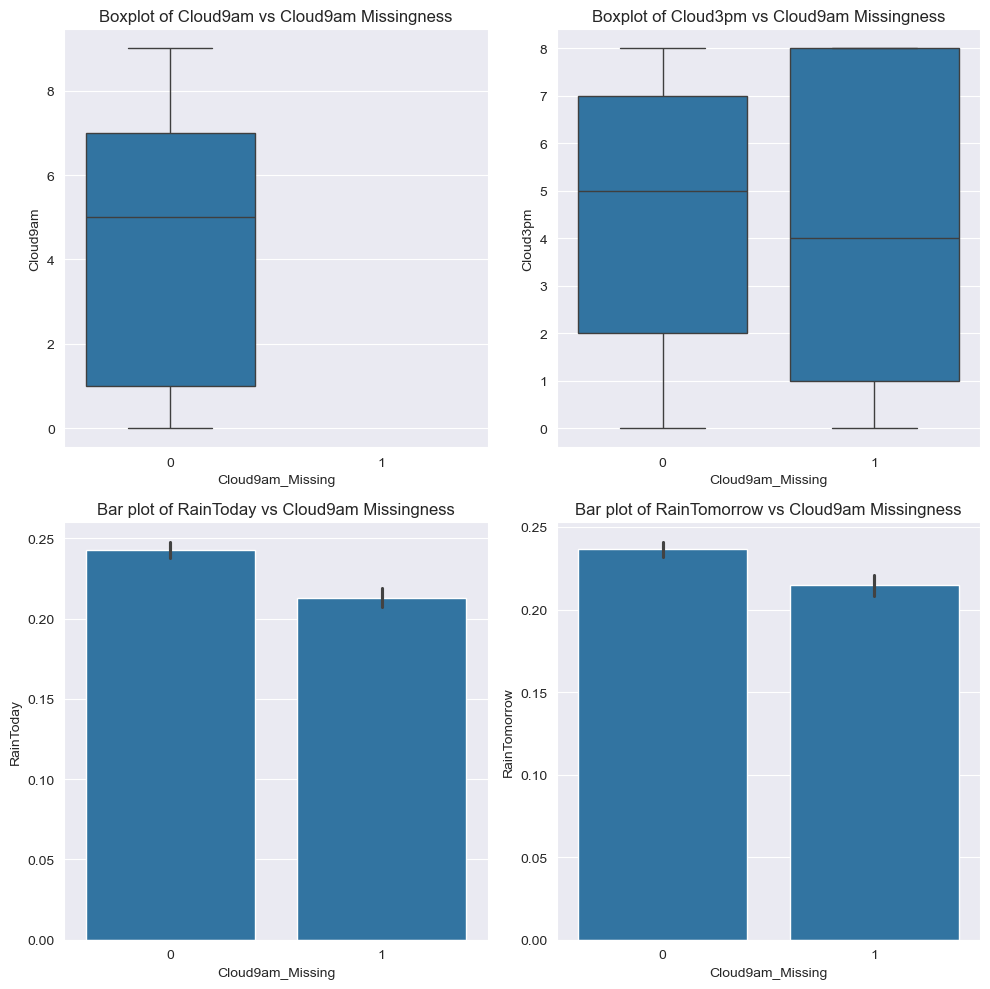

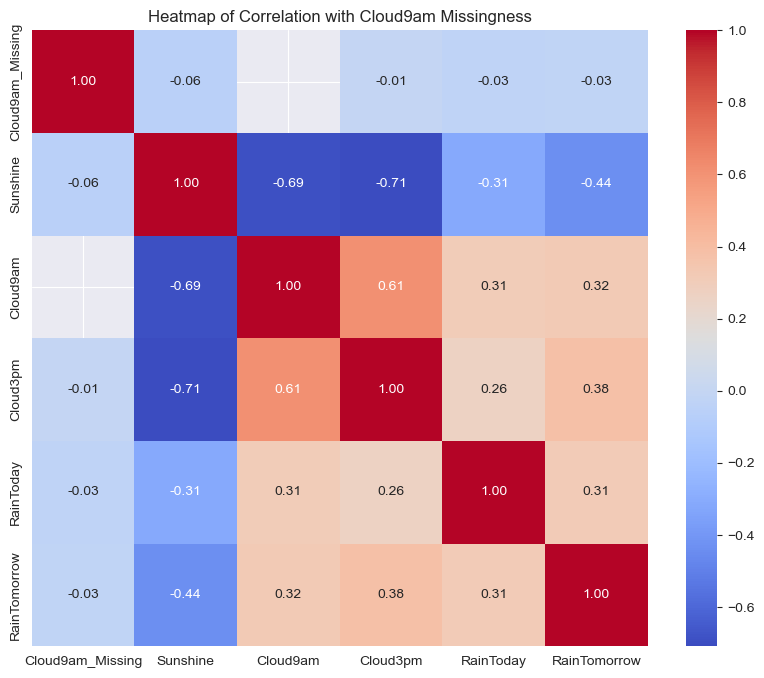

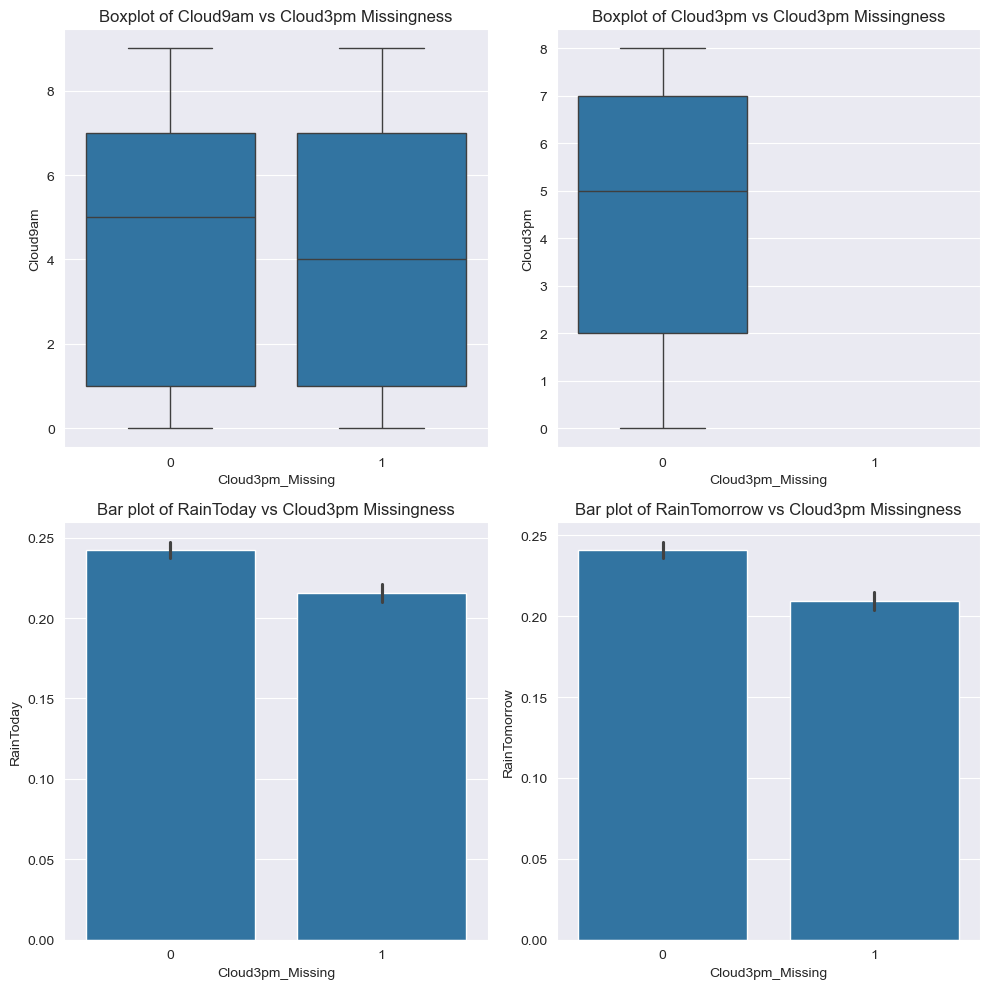

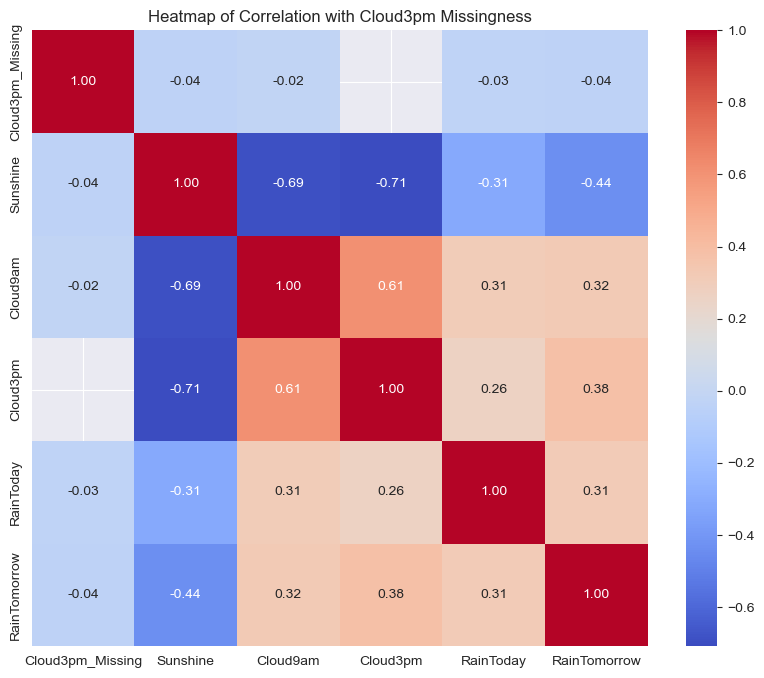

In [13]:
# test the class
sunshine_test = nan_meaning_test('Sunshine')
sunshine_test.test_and_purge()


evap_test = nan_meaning_test('Evaporation')
evap_test.test_and_purge()

cloud9am_test = nan_meaning_test('Cloud9am')
cloud9am_test.test_and_purge()

cloud3pm_test = nan_meaning_test('Cloud3pm')
cloud3pm_test.test_and_purge()


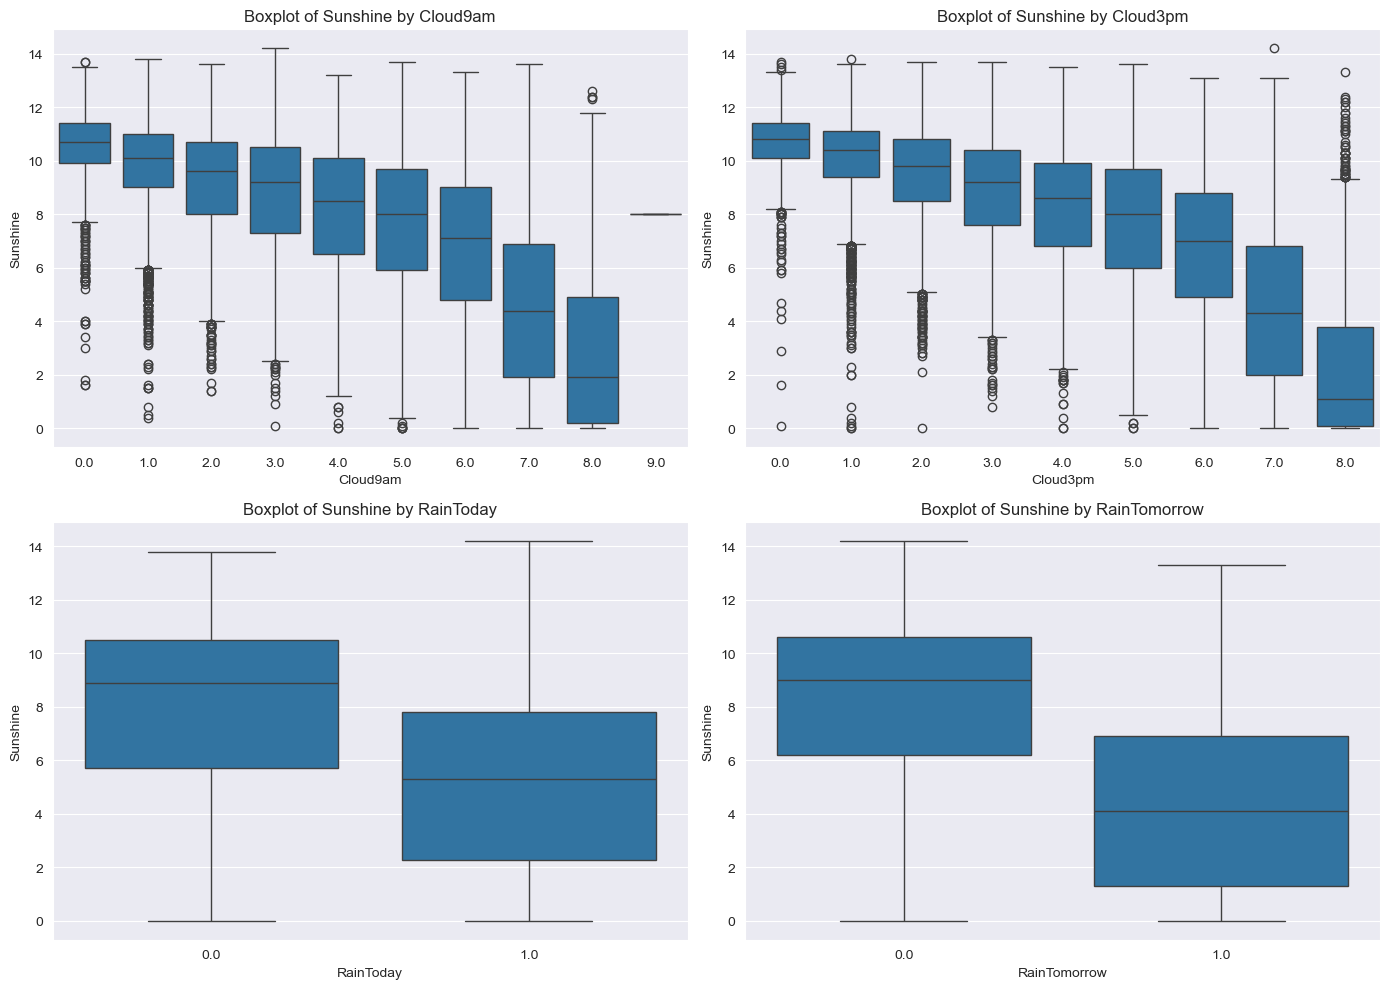

In [24]:
# Since we want to plot with RainTomorrow, we need to ensure that it's included
# For this, we'll use the train-val set as it includes the target variable
original_train = pd.read_csv('train-val.csv')
# Filtering the dataset to exclude rows with missing values for the variables of interest
filtered_data = original_train.dropna(subset=['Sunshine', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'])

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Sunshine vs Cloud9am
plt.subplot(2, 2, 1)
sns.boxplot(x='Cloud9am', y='Sunshine', data=filtered_data)
plt.title('Boxplot of Sunshine by Cloud9am')

# Sunshine vs Cloud3pm
plt.subplot(2, 2, 2)
sns.boxplot(x='Cloud3pm', y='Sunshine', data=filtered_data)
plt.title('Boxplot of Sunshine by Cloud3pm')

#Sunshine vs RainToday
plt.subplot(2, 2, 3)
sns.boxplot(x='RainToday', y='Sunshine', data=filtered_data)
plt.title('Boxplot of Sunshine by RainToday')

#Sunshine vs RainTomorrow
plt.subplot(2, 2, 4)
sns.boxplot(x='RainTomorrow', y='Sunshine', data=filtered_data)
plt.title('Boxplot of Sunshine by RainTomorrow')

plt.tight_layout()
plt.show()

## Κάνουμε  delete τα πρώτα 4 attributes με τα περισσότερα missing values (Sunshine,Evaporation,Cloud3pm,Cloud9am)


In [14]:
cols_to_drop = ['Sunshine','Evaporation','Cloud3pm','Cloud9am']
data.drop(cols_to_drop, axis=1, inplace=True)
test_data.drop(cols_to_drop, axis=1, inplace=True)

# For numerical columns, we'll impute missing values with the median (to avoid the influence of outliers)
num_cols = data.select_dtypes(include=['number']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# For categorical columns, we'll impute missing values with the mode ( the most frequent value for each attribute)
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)
    test_data[col] = test_data[col].fillna(mode)



# Check if there are any missing values left
missing_values_train = data.isnull().sum()
missing_values_test = test_data.isnull().sum()

print('Train missing values:\n', missing_values_train)
print('Test missing values:\n', missing_values_test)
data.head(), test_data.head()


Train missing values:
 id               0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
WeekOfYear       0
dtype: int64
Test missing values:
 Date               0
Location           0
MinTemp           35
MaxTemp           16
Rainfall           0
WindGustDir        0
WindGustSpeed    688
WindDir9am         0
WindDir3pm         0
WindSpeed9am      76
WindSpeed3pm     184
Humidity9am      108
Humidity3pm      243
Pressure9am      942
Pressure3pm      950
Temp9am           48
Temp3pm          188
RainToday          0
WeekOfYear         0
dtype: int64


(   id       Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
 0   1 2009-03-04   Albury     13.8     22.1       0.2         WNW   
 1   2 2009-03-05   Albury     11.5     22.0       0.0          SW   
 2   3 2009-03-09   Albury     13.8     31.8       0.0         NNE   
 3   4 2009-03-10   Albury     15.5     32.0       0.0          NE   
 4   5 2009-03-11   Albury     18.4     30.5       1.2          NE   
 
    WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  Humidity9am  \
 0           57.0          W        WNW  ...          33.0         57.0   
 1           50.0        WSW          W  ...          33.0         60.0   
 2           24.0        SSE         NE  ...          17.0         49.0   
 3           50.0        ESE          E  ...           4.0         51.0   
 4           44.0         NE          N  ...          19.0         57.0   
 
    Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
 0         26.0       1014.5       1013.1     15.6  

## Τα κύρια NaN attributes έχουν correlation <20% συνεπώς δεν είναι χρήσιμα στο dataset.
## Δεν φαίνεται κάποιο correlation από τα των atrributes Θα μπορούσαμε να κάνουμε impute κάποιες για το sunshine (πχ) με βάση τα data.

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [15]:
test_data.to_csv('my_test.csv')
data.to_csv('my_train.csv')

In [16]:
# Here we forget about the numerical values and just encode the categorical ones
from sklearn.preprocessing import OneHotEncoder

cat_cols = data.select_dtypes(include=['object']).columns.difference(['Date'])  # ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

encoder.fit(data[cat_cols])

encoded_cats_train = encoder.transform(data[cat_cols])
encoded_cats_test = encoder.transform(test_data[cat_cols])

encoded_cat_columns = encoder.get_feature_names_out(cat_cols)

encoded_train_df = pd.DataFrame(encoded_cats_train, columns=encoded_cat_columns)
encoded_train_df.to_csv('my_train_encoded.csv')
encoded_test_df = pd.DataFrame(encoded_cats_test, columns=encoded_cat_columns)
encoded_test_df.to_csv('my_test_encoded.csv')

encoded_cats_train.shape, encoded_cats_test.shape

//anaconda3/envs/pythonProject/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((48423, 93), (9699, 93))

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν τη θεωρείτε απαραίτητη

In [17]:
from sklearn.preprocessing import StandardScaler
# Now we forget about the categorical values and scale only the numerical ones

# Here we don't use inline because we don't want to change the real data this time
numerical_cols_train = data.select_dtypes(include=['number']).columns.drop(['id', 'RainTomorrow', 'WeekOfYear'])
numerical_cols_test = test_data.select_dtypes(include=['number']).columns.drop('WeekOfYear')  # 'id' is already not present

scaler = StandardScaler()
scaler.fit(data[numerical_cols_train])

scaled_numerical_train = scaler.transform(data[numerical_cols_train])
scaled_numerical_test = scaler.transform(test_data[numerical_cols_test])


# For the training data, we need to include the target variable as well
final_train_data = np.hstack((scaled_numerical_train, encoded_cats_train, data[['WeekOfYear']].values, data[['RainTomorrow']].values))
final_test_data = np.hstack((scaled_numerical_test, encoded_cats_test, test_data[['WeekOfYear']].values))

final_train_df = pd.DataFrame(final_train_data)
final_test_df = pd.DataFrame(final_test_data)

final_train_df.to_csv('final_train.csv')
final_test_df.to_csv('final_test.csv')

# Checking the shapes of the final datasets ready for model input
final_train_data.shape, final_test_data.shape

((48423, 108), (9699, 107))

In [18]:
# Create a list of the new column names for the one-hot encoded categorical data
encoded_cat_columns = encoder.get_feature_names_out(cat_cols)

# Combine this list with the names of the numerical columns and the added 'WeekOfYear' feature
final_column_names_train = list(numerical_cols_train) + list(encoded_cat_columns) + ['WeekOfYear', 'RainTomorrow']
final_column_names_test = list(numerical_cols_test) + list(encoded_cat_columns) + ['WeekOfYear']

# Create the final DataFrames with the correct column names
final_train_df_with_names = pd.DataFrame(final_train_data, columns=final_column_names_train)
final_test_df_with_names = pd.DataFrame(final_test_data, columns=final_column_names_test)

# Save the DataFrames with column names to CSV files
final_train_df_with_names.to_csv('final_train.csv', index=False)
final_test_df_with_names.to_csv('final_test.csv', index=False)

final_column_names_train

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums'

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.
3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.
3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

train_data = pd.read_csv('final_train.csv')


X = train_data.drop('RainTomorrow', axis=1)
y = train_data['RainTomorrow']
print(X.shape, y.shape)

# Splitting the data into training and validation sets first
X_train_tmp, X_val, y_train_tmp, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_tmp, y_train_tmp)

# Now X_train_resampled and y_train_resampled are your training data for the model
print(X_train.shape, y_train.shape)

# X_val and y_val remain unchanged and are used for validation


(48423, 107) (48423,)


//anaconda3/envs/pythonProject/lib/python3.10/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


(52360, 107) (52360,)


### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.
 4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).
 4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.

In [20]:
from sklearn.metrics import classification_report, accuracy_score

class Model:
    def __init__(self, model, instant_fit_eval=False):
        global X_train
        global X_val
        global y_train
        global y_val
        self.model = model
        self.accuracy = 0.0
        self.classification_report = ''
        if instant_fit_eval:
            print(self.model)
            self.fit()
            self.eval_res()
        
        
    def fit(self):
        self.model.fit(X_train, y_train)
        
    def eval_res(self):
        y_pred = self.model.predict(X_val)
        self.accuracy = accuracy_score(y_val, y_pred)
        self.classification_report = classification_report(y_val, y_pred)
        print(f'accuracy:\n{self.accuracy}')
        print(f'classification report: {self.classification_report}')
    
    def __str__(self):
        return self.model.__str__()
    

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# 1. Naive Bayes 2. KNeighborsClassifier 3. LogisticRegression 4. MLP με ένα κρυφό επίπεδο 5. SVC 6. Decision Tree 7. Random Forest

gnb = Model(GaussianNB(), instant_fit_eval=True)
knn = Model(KNeighborsClassifier(), instant_fit_eval=True)
reg = Model(LogisticRegression(max_iter=1000), instant_fit_eval=True)
mlp = Model(MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42), instant_fit_eval=True)
svc = Model(SVC(), instant_fit_eval=True)
tree= Model(DecisionTreeClassifier(random_state=42), instant_fit_eval=True)
r_forest = Model(RandomForestClassifier(random_state=42), instant_fit_eval=True)

GaussianNB()
accuracy:
0.6112755558614993
classification report:               precision    recall  f1-score   support

         0.0       0.86      0.59      0.70     11184
         1.0       0.33      0.69      0.45      3343

    accuracy                           0.61     14527
   macro avg       0.60      0.64      0.58     14527
weighted avg       0.74      0.61      0.64     14527

KNeighborsClassifier()
accuracy:
0.714875748606044
classification report:               precision    recall  f1-score   support

         0.0       0.92      0.69      0.79     11184
         1.0       0.43      0.80      0.56      3343

    accuracy                           0.71     14527
   macro avg       0.68      0.74      0.68     14527
weighted avg       0.81      0.71      0.74     14527

LogisticRegression(max_iter=1000)
accuracy:
0.7969986920905899
classification report:               precision    recall  f1-score   support

         0.0       0.92      0.80      0.86     11184
         1.0

4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


The most accurate model is: RandomForestClassifier(random_state=42)
The highest F1-score model is: RandomForestClassifier(random_state=42)


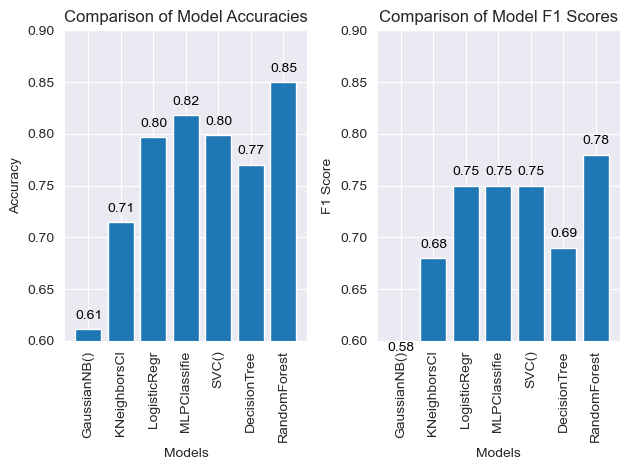

In [22]:
from numpy import argmax
import re

model_list = [gnb, knn, reg, mlp, svc, tree, r_forest]
model_names = [str(m)[:12] for m in model_list]
model_accuracy_list = [m.accuracy for m in model_list]
get_f1 = lambda report: float(re.search('macro avg\s+\d+.\d+\s+\d+.\d+\s+(\d+.\d+)', report).group(1))
model_f1_list = [get_f1(m.classification_report) for m in model_list ]

print(f'The most accurate model is: {str(model_list[argmax(model_accuracy_list)])}')
print(f'The highest F1-score model is: {str(model_list[argmax(model_f1_list)])}')

# Set up the matplotlib figure with two subplots, one for accuracy and one for F1 score, using the alternative subplot notation

# Plot for accuracy scores
plt.subplot(121)  # 1 row, 2 columns, 1st subplot
plt.bar(model_names, model_accuracy_list)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0.6, 0.9])  # Set y-axis to start from 0.7 to better highlight differences
plt.xticks(rotation='vertical')
# Display values on the bars for accuracy
for i, v in enumerate(model_accuracy_list):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', color='black')

# Plot for F1 scores
plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
plt.bar(model_names, model_f1_list)
plt.title('Comparison of Model F1 Scores')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim([0.6, 0.9])  # Set y-axis to start from 0.6 to better highlight differences
plt.xticks(rotation='vertical')
# Display values on the bars for F1 scores
for i, v in enumerate(model_f1_list):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', color='black')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
# Show the plot
plt.show()


### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το σύνολο εκπαίδευσης [test set](https://drive.google.com/file/d/18PMqdPSuJ4CurrzYlahooNMJWZ_8n11o/view?usp=sharing).


In [27]:
cols_from_train = list(r_forest.model.feature_names_in_)
cols_from_train


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums'

In [29]:
# first impute in test_data then predict
test_data = pd.read_csv('final_test.csv')

# choose the cols that were used during training just to be safe (in case there are more in the test dataset)
cols_from_train = list(r_forest.model.feature_names_in_)

# Fill missing values for numerical features with the median
for column in test_data[cols_from_train].select_dtypes(include=np.number).columns:
    median_value = test_data[column].median()
    test_data[column].fillna(median_value, inplace=True)

# Fill missing values for categorical features with the mode
for column in test_data[cols_from_train].select_dtypes(include=['object', 'bool']).columns:
    mode_value = test_data[column].mode()[0]
    test_data[column].fillna(mode_value, inplace=True)


y_test_pred = r_forest.model.predict(test_data[cols_from_train])
y_test_pred.shape

(9699,)

5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [30]:
prediction_df = pd.DataFrame({'RainTomorrow': y_test_pred})
prediction_df.to_csv('part1_predictions.csv', index=True, index_label='id')

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [ ]:
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm

# Load the dataset
final_train_df = pd.read_csv('final_train.csv')
X = final_train_df.iloc[:, :-1]  # all columns except the last one as features
y = final_train_df.iloc[:, -1]   # the last column as the label

# Define the hyperparameter grid for each classifier
param_grids = {
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    'MLP': {
        'model': MLPClassifier(random_state=42),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['tanh', 'relu'],
            'max_iter': [300, 500, 700]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

# Initialize dictionary to store the best models and their scores
best_models = {}
best_scores = {}

# Perform grid search for each classifier
print("Oprimizing Classifiers")
for classifier_name in param_grids.keys():
    grid_data = param_grids[classifier_name]
    print(f"Starting grid search for {classifier_name}...")
    grid_search = GridSearchCV(grid_data['model'], grid_data['params'], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X, y)
    best_models[classifier_name] = grid_search.best_estimator_
    best_scores[classifier_name] = grid_search.best_score_
    print(f"Best F1 score for {classifier_name}: {grid_search.best_score_}")
    print(f"Best parameters for {classifier_name}: {grid_search.best_params_}")

# Print the best models and their F1 scores
print("Best models and their F1 scores:")
for classifier_name, score in best_scores.items():
    print(f"{classifier_name}: {score}")



6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).
6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.

In [ ]:
svc_best = Model(SVC(C=1, gamma='auto', kernel='rbf', random_state=42), instant_fit_eval=True)
knn_best = Model(KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance'), instant_fit_eval=True)
reg_best = Model(LogisticRegression(C=0.1, penalty='l2', solver='liblinear'), instant_fit_eval=True)
mlp_best = Model(MLPClassifier(activation='relu', hidden_layer_sizes=(50,), max_iter=500), instant_fit_eval=True)
tree_best = Model(DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2), instant_fit_eval=True)
r_forest_best = Model(
    RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=4, min_samples_split=10,
                           n_estimators=100), instant_fit_eval=True)

6.δ. Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.

In [ ]:
from numpy import argmax
import re

best_model_list = [gnb, knn_best, reg_best, mlp_best, svc_best, tree_best, r_forest_best]
model_names = [str(m)[:12] for m in best_model_list]
model_accuracy_list = [m.accuracy for m in best_model_list]
get_f1 = lambda report: float(re.search('macro avg\s+\d+.\d+\s+\d+.\d+\s+(\d+.\d+)', report).group(1))
model_f1_list = [get_f1(m.classification_report) for m in best_model_list]

print(f'The most accurate model is: {str(best_model_list[argmax(model_accuracy_list)])}')
print(f'The highest F1-score model is: {str(best_model_list[argmax(model_f1_list)])}')

# Set up the matplotlib figure with two subplots, one for accuracy and one for F1 score, using the alternative subplot notation

# Plot for accuracy scores
plt.subplot(121)  # 1 row, 2 columns, 1st subplot
plt.bar(model_names, model_accuracy_list)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0.6, 0.9])  # Set y-axis to start from 0.7 to better highlight differences
plt.xticks(rotation='vertical')
# Display values on the bars for accuracy
for i, v in enumerate(model_accuracy_list):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', color='black')

# Plot for F1 scores
plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
plt.bar(model_names, model_f1_list)
plt.title('Comparison of Model F1 Scores')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim([0.6, 0.9])  # Set y-axis to start from 0.6 to better highlight differences
plt.xticks(rotation='vertical')
# Display values on the bars for F1 scores
for i, v in enumerate(model_f1_list):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', color='black')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
# Show the plot
plt.show()



Είναι προφανές ότι το random forest classifier έχει την καλύτερη απόδοση μεταξύ των μοντέλων